## Intro_to_keras

###### more: https://keras.io/

### Imports

In [51]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import plot_model

from sklearn.metrics import classification_report
import numpy as np
import matplotlib.pyplot as plt

### Load Fashion MNIST dataset
###### More datasets on:https://keras.io/datasets/

In [4]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

#### Target Names

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### Some statistics about counts

In [6]:
print("Train images shape:",train_images.shape)
print("Test images shape:",train_labels.shape)

Train images shape: (60000, 28, 28)
Test images shape: (60000,)


In [7]:
print("Train images shape:",test_images.shape)
print("Test images shape:",test_labels.shape)

Train images shape: (10000, 28, 28)
Test images shape: (10000,)


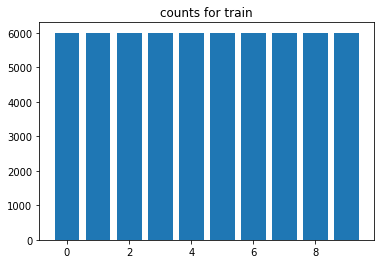

In [8]:
classes, counts = np.unique(train_labels, return_counts=1)
plt.bar(classes,counts)
plt.title("counts for train");

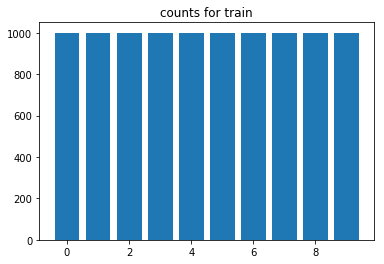

In [9]:
classes, counts = np.unique(test_labels, return_counts=1)
plt.bar(classes,counts)
plt.title("counts for train");

In [10]:
# simple function for plot random images
def plot_images(X,y,size=10):
    for i in range(size):
        idx = np.random.randint(low = 0, high = X.shape[0],size = 1)
        img = X[idx]
        label = class_names[y[idx][0]]
        plt.imshow(img.reshape(28,28), cmap='gray')
        plt.title(label)
        plt.show()
        

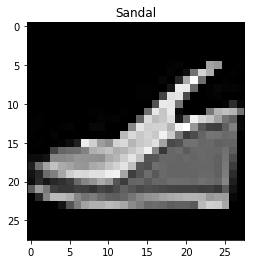

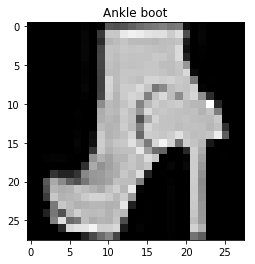

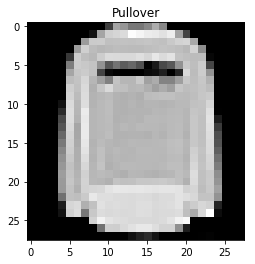

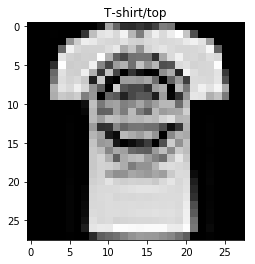

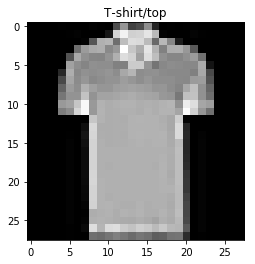

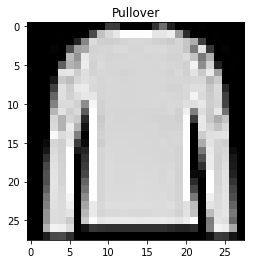

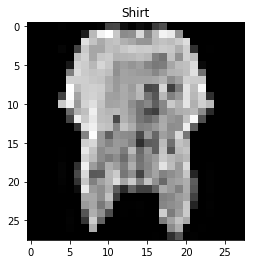

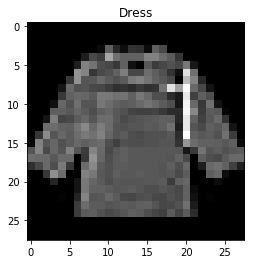

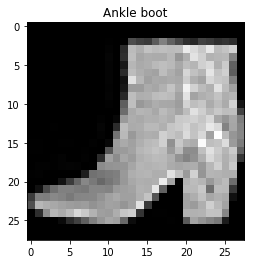

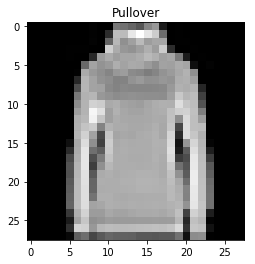

In [11]:
plot_images(train_images,train_labels)

### Normalize images

In [11]:
train_images = train_images / 255.0

test_images = test_images / 255.0

### Build model
#### see more: 
https://keras.io/models/about-keras-models/
https://keras.io/models/sequential/
https://keras.io/layers/core/

In [45]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [46]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [47]:
keras.backend.clear_session()


In [48]:
# second version
keras.backend.clear_session()

model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(128,activation="relu"))
model.add(keras.layers.Dense(10,activation="softmax"))


In [49]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [52]:
plot_model(model)

Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.


### With model.compile() we can chose our loss, metrics and optimizer

###### see more: https://keras.io/models/model/


In [15]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Train our model with model.fit()
#### model.fit() method return history of training procces

In [16]:
history = model.fit(train_images, train_labels, validation_split = 0.33, epochs=10)



Train on 40199 samples, validate on 19801 samples
Epoch 1/10
40199/40199 [==============================] - 2s 47us/sample - loss: 4.1874 - acc: 0.6647 - val_loss: 0.8599 - val_acc: 0.7067
Epoch 2/10
40199/40199 [==============================] - 2s 45us/sample - loss: 0.7640 - acc: 0.7321 - val_loss: 0.7630 - val_acc: 0.7541
Epoch 3/10
40199/40199 [==============================] - 2s 44us/sample - loss: 0.6323 - acc: 0.7733 - val_loss: 0.6272 - val_acc: 0.7937
Epoch 4/10
40199/40199 [==============================] - 2s 38us/sample - loss: 0.5973 - acc: 0.7744 - val_loss: 0.6587 - val_acc: 0.7590
Epoch 5/10
40199/40199 [==============================] - 2s 41us/sample - loss: 0.5783 - acc: 0.7865 - val_loss: 0.6725 - val_acc: 0.7559
Epoch 6/10
40199/40199 [==============================] - 2s 38us/sample - loss: 0.5661 - acc: 0.7891 - val_loss: 0.5559 - val_acc: 0.8067
Epoch 7/10
40199/40199 [==============================] - 2s 45us/sample - loss: 0.5545 - acc: 0.7975 - val_loss: 0.

#### We can visualize training and validation loss

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


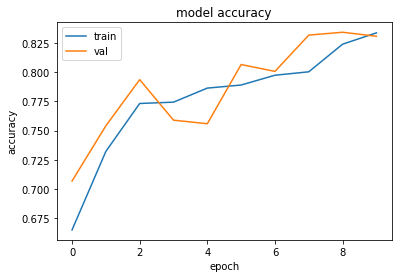

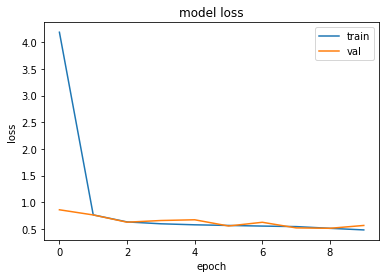

In [17]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

### Evaluate loss and accuracy on test dataset

In [18]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('\n Accuracy in test dataset:', test_acc)

10000/10000 [==============================] - 0s 15us/sample - loss: 0.6041 - acc: 0.8204

 Accuracy in test dataset: 0.8204


### Save model weights 

In [19]:
model.save_weights("My_first_model.h5")

### Load weights

In [20]:
model2 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [21]:
model2.load_weights("My_first_model.h5")

In [35]:
pred_softmax = model2.predict_on_batch(test_images)
test_prediction = np.argmax(pred_softmax,axis=1)
print(classification_report(test_labels,test_prediction))

              precision    recall  f1-score   support

           0       0.76      0.82      0.79      1000
           1       0.98      0.95      0.97      1000
           2       0.53      0.87      0.66      1000
           3       0.81      0.88      0.84      1000
           4       0.78      0.61      0.68      1000
           5       0.98      0.91      0.94      1000
           6       0.75      0.35      0.48      1000
           7       0.88      0.97      0.92      1000
           8       0.95      0.93      0.94      1000
           9       0.96      0.92      0.94      1000

    accuracy                           0.82     10000
   macro avg       0.84      0.82      0.82     10000
weighted avg       0.84      0.82      0.82     10000

